# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
import matplotlib.pyplot as plt
%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\nenit\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
# Read your api key environment variable
from newsapi import NewsApiClient
from dotenv import load_dotenv
load_dotenv()
api_key = os.getenv("NewsAPI")

In [3]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=api_key)


In [4]:
# Fetch the Bitcoin news articles
BTC_news = newsapi.get_everything(q="bitcoin", language="en")
BTC_news["totalResults"]

9986

In [5]:
# Fetch the Ethereum news articles
ETH_news = newsapi.get_everything(q="ethereum", language="en")
ETH_news["totalResults"]

2552

In [6]:
# Create the Bitcoin sentiment scores DataFrame
# Download/Update the VADER Lexicon
nltk.download('vader_lexicon')

# Initialize the VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

BTC_sentiments = []

for article in BTC_news["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        BTC_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
BTC_df = pd.DataFrame(BTC_sentiments)

# Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
BTC_df =BTC_df[cols]

BTC_df.head()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\nenit\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


,date,text,compound,positive,negative,neutral
0,2021-06-09,El Salvador's President Nayib Bukele has made ...,0.8402,0.282,0.0,0.718
1,2021-06-09,El Salvador has become the first country in th...,0.1280,0.043,0.0,0.957
2,2021-06-14,"It's all about clean energy, it seems. \r\nElo...",0.6908,0.169,0.0,0.831
3,2021-06-09,image captionThe move means bitcoin will be ac...,0.2732,0.060,0.0,0.940
4,2021-06-11,"Several crypto fans that descended on Miami, F...",0.5574,0.107,0.0,0.893


In [7]:
# Create the Ethereum sentiment scores DataFrame
ETH_sentiments = []

for article in ETH_news["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        ETH_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
ETH_df = pd.DataFrame(ETH_sentiments)

# Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
ETH_df =ETH_df[cols]

ETH_df.head()

,date,text,compound,positive,negative,neutral
0,2021-06-17,TL;DR: The Cryptocurrency with Ethereum and So...,0.0000,0.00,0.000,1.000
1,2021-06-20,It wasn't long ago that your average person ha...,-0.2960,0.00,0.061,0.939
2,2021-06-10,This article was translated from our Spanish e...,-0.3400,0.00,0.066,0.934
3,2021-07-02,Bitcoin and Ethereum\r\nYuriko Nakao\r\nEther ...,0.3612,0.11,0.041,0.849
4,2021-06-03,This new mining feature is called 'Norton Cryp...,0.0000,0.00,0.000,1.000


In [8]:
# Describe the Bitcoin Sentiment
BTC_df.describe()

,compound,positive,negative,neutral
count,20.000000,20.000000,20.000000,20.000000
mean,0.211855,0.077350,0.020400,0.902200
std,0.329191,0.071029,0.032425,0.072576
min,-0.381800,0.000000,0.000000,0.718000
25%,0.000000,0.032250,0.000000,0.844750
50%,0.165150,0.065500,0.000000,0.922000
75%,0.369700,0.107250,0.057250,0.955500
max,0.840200,0.282000,0.083000,1.000000


In [9]:
# Describe the Ethereum Sentiment
ETH_df.describe()

,compound,positive,negative,neutral
count,20.000000,20.000000,20.000000,20.000000
mean,-0.029295,0.026650,0.032700,0.940650
std,0.298916,0.038688,0.042269,0.054667
min,-0.458800,0.000000,0.000000,0.782000
25%,-0.278900,0.000000,0.000000,0.925250
50%,0.000000,0.000000,0.000000,0.938500
75%,0.207425,0.065500,0.061250,1.000000
max,0.493900,0.110000,0.151000,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: Bitcoin 

Q: Which coin had the highest compound score?

A: Bitcoin

Q. Which coin had the highest positive score?

A: Bitcoin

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [10]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [11]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

# Create a list of stopwords
#sw = set(stopwords.words('english'))
#first_result = [word.lower() for word in words if word.lower() not in sw]

# Expand the default stopwords list if necessary

expanded_stopwords = ['btc', 'bitcoin', 'eth', 'ethereum']

In [12]:
def tokenizer(text):
    """Tokenizes text."""
    
    # Create a list of the words
    text = word_tokenize(text)
    
    # Convert the words to lowercase
    text = [word.lower() for word in text]
    
    # Remove the punctuation
    regex = re.compile("[^a-zA-Z ]")
    text = [regex.sub('', word) for word in text]
    
    # Remove the stop words    
    sw = set(stopwords.words('english') + expanded_stopwords)

    # Lemmatize Words into root words
    lemmatizer = WordNetLemmatizer()
    text = [lemmatizer.lemmatize(word) for word in text]
    text = [word for word in text if word not in sw]
    return text

In [13]:
btc_tokens = []
[btc_tokens.append(tokenizer(text)) for text in BTC_df.text]   
BTC_df['Tokens'] = btc_tokens
BTC_df.head()

,date,text,compound,positive,negative,neutral,Tokens
0,2021-06-09,El Salvador's President Nayib Bukele has made ...,0.8402,0.282,0.0,0.718,"[el, salvador, president, nayib, bukele, ha, m..."
1,2021-06-09,El Salvador has become the first country in th...,0.1280,0.043,0.0,0.957,"[el, salvador, ha, become, first, country, wor..."
2,2021-06-14,"It's all about clean energy, it seems. \r\nElo...",0.6908,0.169,0.0,0.831,"[clean, energy, , seems, , elon, musk, tesla, ..."
3,2021-06-09,image captionThe move means bitcoin will be ac...,0.2732,0.060,0.0,0.940,"[image, captionthe, move, mean, accepted, ever..."
4,2021-06-11,"Several crypto fans that descended on Miami, F...",0.5574,0.107,0.0,0.893,"[several, crypto, fan, descended, miami, , flo..."


In [14]:
# Create a new tokens column for Ethereum
btc_tokens = []
[btc_tokens.append(tokenizer(text)) for text in ETH_df.text]   
ETH_df['Tokens'] = btc_tokens
ETH_df.head()

,date,text,compound,positive,negative,neutral,Tokens
0,2021-06-17,TL;DR: The Cryptocurrency with Ethereum and So...,0.0000,0.00,0.000,1.000,"[tl, , dr, , cryptocurrency, solidity, blockch..."
1,2021-06-20,It wasn't long ago that your average person ha...,-0.2960,0.00,0.061,0.939,"[wa, nt, long, ago, average, person, clue, nft..."
2,2021-06-10,This article was translated from our Spanish e...,-0.3400,0.00,0.066,0.934,"[article, wa, translated, spanish, edition, us..."
3,2021-07-02,Bitcoin and Ethereum\r\nYuriko Nakao\r\nEther ...,0.3612,0.11,0.041,0.849,"[yuriko, nakao, ether, overtook, number, activ..."
4,2021-06-03,This new mining feature is called 'Norton Cryp...,0.0000,0.00,0.000,1.000,"[new, mining, feature, called, norton, crypto,..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [15]:
from collections import Counter
from nltk import ngrams

In [16]:
# Generate the Bitcoin N-grams where N=2
btc_bigram_counts = [Counter(ngrams(tokens, n=2)) for tokens in BTC_df.Tokens]
dict(btc_bigram_counts[0].most_common(10))

{('el', 'salvador'): 1,
 ('salvador', 'president'): 1,
 ('president', 'nayib'): 1,
 ('nayib', 'bukele'): 1,
 ('bukele', 'ha'): 1,
 ('ha', 'made'): 1,
 ('made', 'good'): 1,
 ('good', 'promise'): 1,
 ('promise', 'adopt'): 1,
 ('adopt', 'legal'): 1}

In [17]:
# Generate the Ethereum N-grams where N=2
eth_bigram_counts = [Counter(ngrams(tokens, n=2)) for tokens in ETH_df.Tokens]
dict(eth_bigram_counts[0].most_common(10))

{('', ''): 5,
 ('tl', ''): 1,
 ('', 'dr'): 1,
 ('dr', ''): 1,
 ('', 'cryptocurrency'): 1,
 ('cryptocurrency', 'solidity'): 1,
 ('solidity', 'blockchain'): 1,
 ('blockchain', 'developer'): 1,
 ('developer', 'bundle'): 1,
 ('bundle', 'sale'): 1}

In [18]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [19]:
# Use token_count to get the top 10 words for Bitcoin
BIGstr = []
for tokens in BTC_df.Tokens:
    BIGstr += tokens
btc_token_count = token_count(BIGstr)
btc_token_count

[('', 189),
 ('char', 19),
 ('salvador', 9),
 ('cryptocurrency', 8),
 ('reuters', 8),
 ('el', 7),
 ('legal', 6),
 ('u', 6),
 ('tender', 5),
 ('country', 5)]

In [20]:
# Use token_count to get the top 10 words for Ethereum
BIGstr = []
for tokens in BTC_df.Tokens:
    BIGstr += tokens
eth_token_count = token_count(BIGstr)
eth_token_count

[('', 189),
 ('char', 19),
 ('salvador', 9),
 ('cryptocurrency', 8),
 ('reuters', 8),
 ('el', 7),
 ('legal', 6),
 ('u', 6),
 ('tender', 5),
 ('country', 5)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [21]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

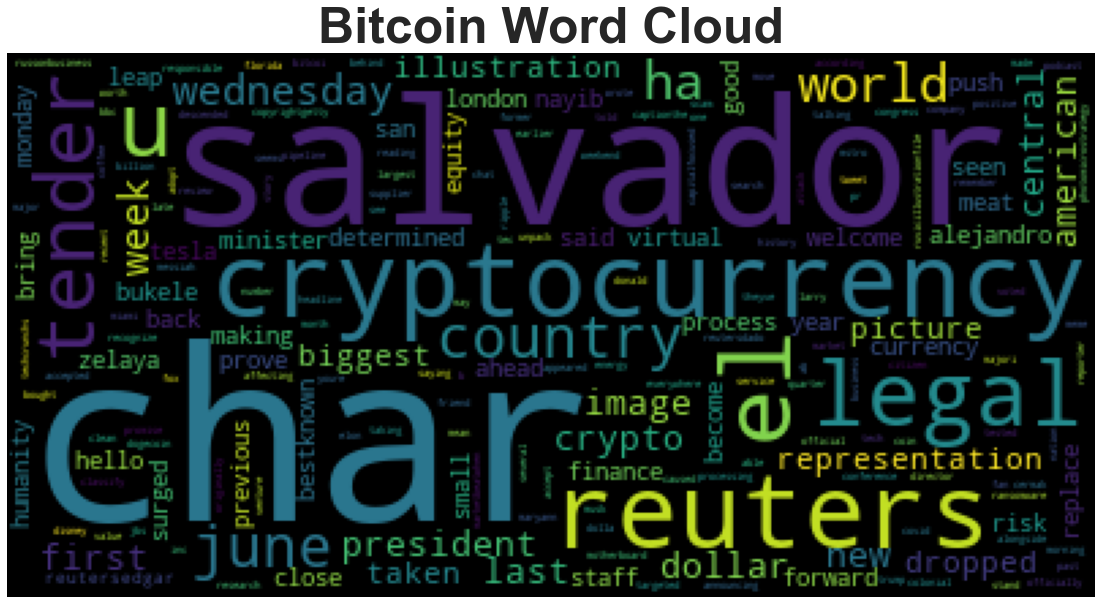

In [22]:
# Generate the Bitcoin word cloud
btc_corpus = ''
sw = set(stopwords.words('english') + expanded_stopwords)
for token in BTC_df.text:
    btc_corpus += token
long_string = " ".join(str(x) for x in tokenizer(btc_corpus))
wc = WordCloud(collocations=False).generate(long_string)
plt.title('Bitcoin Word Cloud', fontsize=50, fontweight='bold')
plt.style.use('seaborn-whitegrid')
plt.imshow(wc)
plt.axis("off")
plt.show()

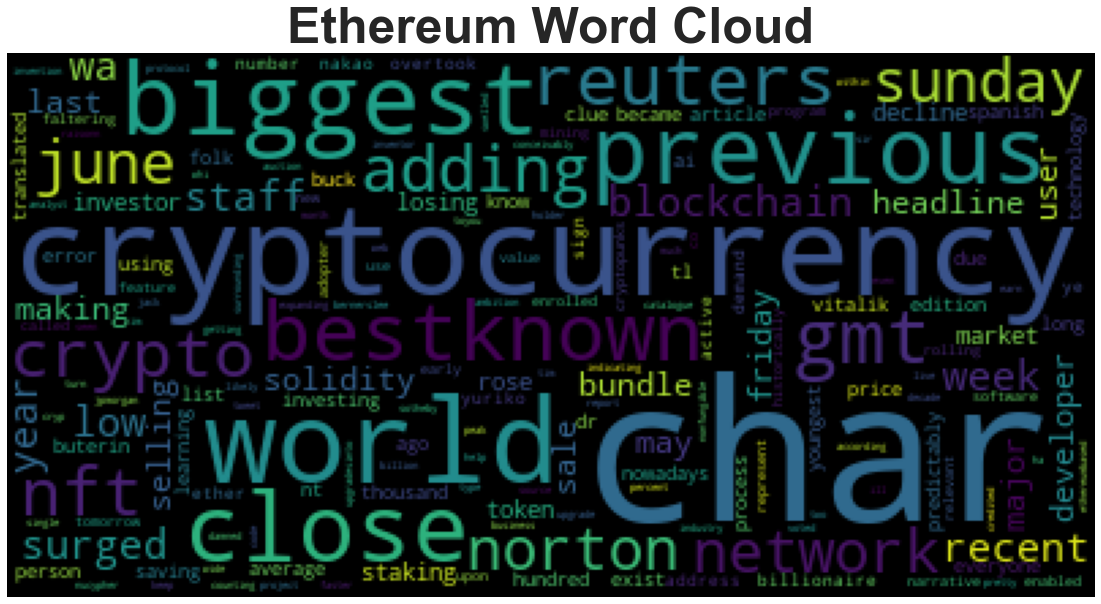

In [23]:
# Generate the Ethereum word cloud
eth_corpus = ''
sw = set(stopwords.words('english') + expanded_stopwords)
for token in ETH_df.text:
    eth_corpus += token
long_string = " ".join(str(x) for x in tokenizer(eth_corpus))
wc = WordCloud(collocations=False).generate(long_string)
plt.title('Ethereum Word Cloud', fontsize=50, fontweight='bold')
plt.style.use('seaborn-whitegrid')
plt.imshow(wc)
plt.axis("off")
plt.show()

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [25]:
import spacy
from spacy import displacy

In [26]:
# Download the language model for SpaCy
!python -m spacy download en_core_web_sm

[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [29]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [28]:
# Concatenate all of the Bitcoin text together
btc_corpus

'El Salvador\'s President Nayib Bukele has made good on his promise to adopt Bitcoin as legal tender. Officials in the Central American country\'s congress voted to accept the cryptocurrency by a majori… [+1414 chars]El Salvador has become the first country in the world to recognize the cryptocurrency bitcoin as legal currency, according to President Nayib Bukele in a tweet on Wednesday. Citizens will be able to … [+3840 chars]It\'s all about clean energy, it seems.\xa0\r\nElon Musk and Tesla caused ripples in the cryptocurrency market in the past few months, first by announcing that Tesla had bought $1.5 billion worth of bitcoi… [+2508 chars]image captionThe move means bitcoin will be accepted everywhere for goods and services, alongside the US dollar\r\nEl Salvador has become the first country in the world to officially classify Bitcoin a… [+2233 chars]Several crypto fans that descended on Miami, Florida, last weekend for the largest bitcoin conference in history are now saying theyv

In [30]:
# Run the NER processor on all of the text
btc_ner = nlp(btc_corpus)
btc_ner.user_data["title"] = "Bitcoin NER"

In [31]:
# Render the visualization
displacy.render(btc_ner, style='ent')

In [32]:
# List all Entities
btc_ents = set([ent.text for ent in btc_ner.ents ])
btc_ents

{'$1.5 billion',
 '0600',
 '2,131.11',
 '2,853.31',
 '2021',
 '27,734',
 '30.8%',
 '32,094.44',
 '35,210',
 '36,265',
 '45.7%',
 '5.71%',
 '6',
 '7.37%',
 '8.54 %',
 'Alejandro Zelaya',
 'BBC News',
 'Bitcoin',
 'Central American',
 'China',
 'Citizens',
 'Colonial Pipeline',
 'Disney',
 'Dogecoin',
 'Donald Trump',
 'Edgar Su',
 'Edgar Su/Illustration',
 'El Salvador',
 "El Salvador's",
 'Elon Musk',
 'Finance',
 'Florida',
 'Fox Business',
 'GMT',
 'JBS',
 'Jan.',
 'June 14, 2021',
 'June 16',
 'June 23',
 'June 7, 2021',
 'Larry Cermak',
 'Last week',
 'Late last week',
 'Mary-Ann RussonBusiness',
 'May 20, 2021',
 'Miami',
 'Monday',
 'Nayib Bukele',
 'Pr',
 'Reuters',
 'SALVADOR',
 'Salvador',
 'Saturday',
 'Tec',
 'Tesla',
 'This week',
 'U.S.',
 'US',
 'Wednesday',
 'covid-19',
 'earlier this year',
 'first',
 'last weekend',
 'morning',
 'the Central American',
 'the past few months',
 'up to one quarter',
 'year'}

---

### Ethereum NER

In [33]:
# Concatenate all of the Ethereum text together
eth_corpus

"TL;DR: The Cryptocurrency with Ethereum and Solidity Blockchain Developer Bundle is on sale for £21.25 as of June 17, saving you 97% on list price.\r\nIs everyone you know investing in cryptocurrency? … [+949 chars]It wasn't long ago that your average person had no clue what an NFT was. Nowadays, they're making headlines for selling for hundreds of thousands of bucks. Predictably, folks are learning about NFTs … [+3056 chars]This article was translated from our Spanish edition using AI technologies. Errors may exist due to this process.\r\nLast May, VitaliK Buterin became the youngest billionaire in the world at just 27 ye… [+2422 chars]Bitcoin and Ethereum\r\nYuriko Nakao\r\nEther overtook bitcoin in the number of active addresses on its network on Friday, a sign that demand is faltering for the world's biggest cryptocurrency as its co… [+2727 chars]This new mining feature is called 'Norton Crypto' and will be rolling out tomorrow to Norton 360 users enrolled in Norton's early adopte

In [34]:
# Run the NER processor on all of the text
eth_ner = nlp(eth_corpus)


# Add a title to the document
eth_ner.user_data["title"] = "Ethereum NER"

In [35]:
# Render the visualization

displacy.render(eth_ner, style='ent')

In [36]:
# List all Entities
eth_ents = ([ent.text for ent in eth_ner.ents ])
set(eth_ents)

{'$40 billion',
 '0600',
 '1,817.87',
 '2,131.11',
 '2,853.31',
 '2,937.27',
 '2021',
 '2025',
 '21.25',
 '22:04',
 '22:05',
 '27',
 '27,7',
 '27,734',
 '3,492.71',
 '30.8%',
 '31,699.83',
 '34.7%',
 '35,210',
 '36,265',
 '37,360.63',
 '40.7%',
 '45.7%',
 '5.11 %',
 '5.71%',
 '6',
 '8.51%',
 '8.54 %',
 '9.83 %',
 '90 percent',
 '97%',
 'AI',
 'Bitcoin',
 'Buterin',
 'Ethereum',
 'February 2018',
 'Friday',
 'GMT',
 'Getty Images\r\nInvestors',
 'Ill',
 'JPMorgan',
 'Jacks',
 'Jan.',
 'June 13',
 'June 17',
 'June 25',
 'Keep Network',
 'Last May',
 'Last week',
 'NFT',
 'Norton',
 'Norton Crypto',
 'Reuters',
 'Saturday',
 "Sotheby's",
 'Spanish',
 'Sunday',
 'Tim Berners-Lee',
 'Wednesday',
 'Yuriko Nakao',
 'as much as',
 'decades',
 'hundreds of thousands',
 'recent months',
 'recent weeks',
 'the third week',
 'tomorrow',
 'year'}

---